In [ ]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])


trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)


# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)



100%|██████████| 9912422/9912422 [00:00<00:00, 124720149.40it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25900298.02it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34271866.98it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6410002.95it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [ ]:
data = [[] for _ in range(10)]
for i, j in trainset:
  data[j].append(i)

In [ ]:
def counter_update(n):
  if (counter[n] == len(data[n]) - 1):
      counter[n] = 0
  else:
      counter[n] +=1

def list_cr(q):
  w = [0, 0, 0, 0]
  w[-1] = q%10
  q = q//10
  w[-2] = q%10
  q = q//10
  w[-3] = q%10
  q = q//10
  w[-4] = q%10
  return w

def pn(a):
  image_data = a

  # Plotting the image
  plt.imshow(image_data, cmap='gray')  # 'gray' can be replaced with other color maps as needed
  plt.colorbar()  # Shows the color scale
  plt.show()

def number(tensor):
  list = []
  x = 0
  for m in [10,20,30,40]:
    a = []
    for i, j in enumerate(tensor[x:m]):
      if j>=0.5:
        a.append(i)
    x = m
    list.append(a)
  return list

In [ ]:
counter = [0]*10

temp_tensors = []
max_num = 10000
num_samples = 10
labels = []
for i in range(max_num):
  l = list_cr(i)

  for j in range(num_samples):
    m0 = data[l[0]][counter[l[0]]][0]
    counter_update(l[0])
    m1 = data[l[1]][counter[l[1]]][0]
    counter_update(l[1])
    m2 = data[l[2]][counter[l[2]]][0]
    counter_update(l[2])
    m3 = data[l[3]][counter[l[3]]][0]
    counter_update(l[3])
    # Concatenate tensors and add to temporary list
    #unsqueezing it for CNN's
    temp_tensors.append(torch.cat((m0, m1, m2, m3), dim=1).unsqueeze(0))

    #labels
    x = [0.0] * 40
    pos = 0
    for k in l:
      x[k+pos] = 1
      pos+=10
    labels.append(x)

image_tensor = torch.stack(temp_tensors)
label_tensor = torch.tensor(labels)

# Checking the final shape of the tensor
print(image_tensor.shape)
print(label_tensor.shape)

torch.Size([100000, 1, 28, 112])
torch.Size([100000, 40])


5


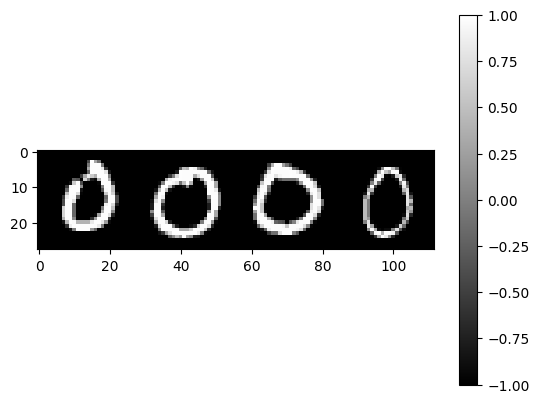

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import time as t
from IPython.display import clear_output  # Import the clear_output function
a = 0
for i in image_tensor:
  clear_output(wait=True)

# Plotting the image
  print(a)
  plt.imshow(i[0], cmap='gray')  # 'gray' can be replaced with other color maps as needed
  plt.colorbar()  # Shows the color scale
  plt.show()
  a+=1
  t.sleep(0.3)

Epoch 1, Train Loss: 0.06518622785061598, Test Loss: 0.018771222295662086
Epoch 2, Train Loss: 0.013278145750239492, Test Loss: 0.01126152259139969
Epoch 3, Train Loss: 0.007748362700268626, Test Loss: 0.01053139170819221
Epoch 4, Train Loss: 0.005083847964322195, Test Loss: 0.008711979438263637
Epoch 5, Train Loss: 0.0036415632720338182, Test Loss: 0.009512095513884513
Epoch 6, Train Loss: 0.002851050241640769, Test Loss: 0.008454616391695084
Epoch 7, Train Loss: 0.002387651222530985, Test Loss: 0.008094276007920944
Epoch 8, Train Loss: 0.002102429838955868, Test Loss: 0.009490148504651463
Epoch 9, Train Loss: 0.0017404808058199706, Test Loss: 0.010382465084273809
Epoch 10, Train Loss: 0.0016795568112953332, Test Loss: 0.008276186531297854


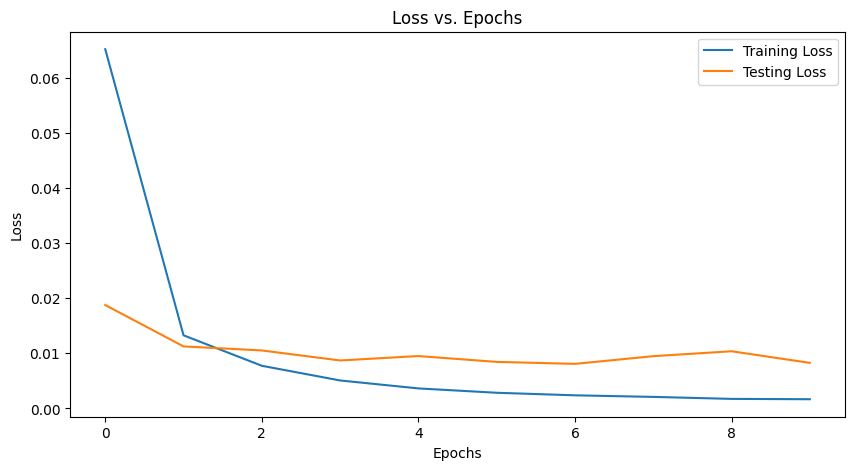

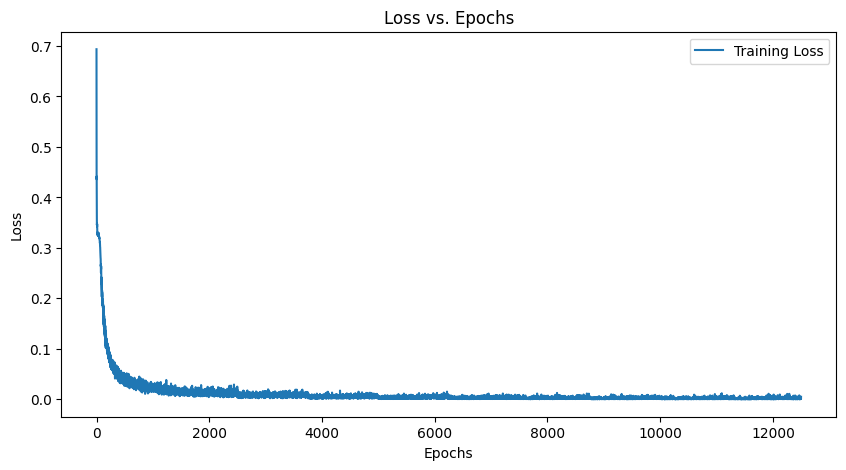

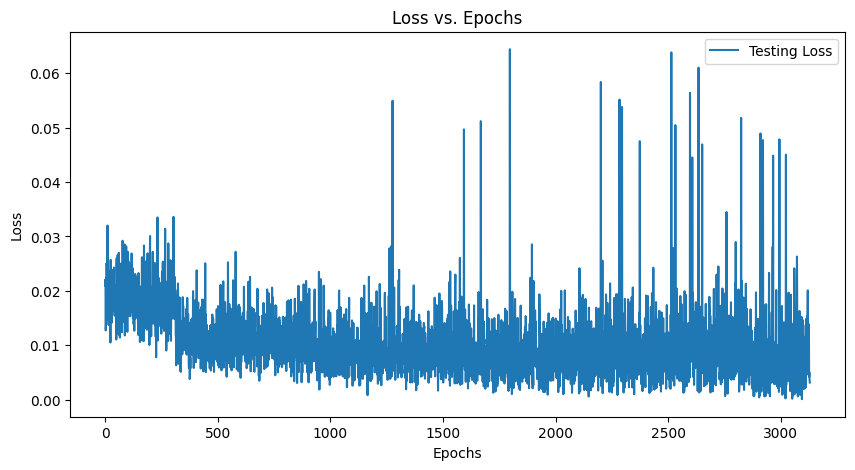

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split

# Define the dataset
dataset = TensorDataset(image_tensor, label_tensor)
#shape of image_tensor torch.Size([100000, 1, 28, 112])
#shape of label_tensor torch.Size([100000, 10])

# Splitting the dataset into training and test sets
train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define DataLoaders for training and testing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2) # Output: 32 x 28 x 112
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # Output: 32 x 14 x 56
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2) # Output: 64 x 14 x 56
        # Max pooling layer
        # After second pooling: 64 x 7 x 28
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 28, 1024)  # Adapt this to the output of the last pool
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 40)  # Assuming 10 classes as in your initial setup
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Apply convolutions, followed by max pooling
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for the fully connected layers
        x = x.view(-1, 64 * 7 * 28)  # Reshape input to batch_size x (64*7*28)
        # Fully connected layers with ReLU activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer with sigmoid activation
        x = self.fc3(x)
        x = self.sigmoid(x)  # Output probabilities for each class
        return x


# Instantiate the model, loss function and optimizer
model = SimpleCNN()
#model = SimpleMultiLabelNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for multilabel
optimizer = optim.Adam(model.parameters(), lr=0.001) # lr = 0.003 for ann model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move your model to the chosen device
model.to(device)
# Training loop
num_epochs = 10
train_losses = []
test_losses = []

loss_sample = []
loss_sample_test = []
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loss_sample.append(loss.item())

    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Evaluation on the test set
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():  # Disable gradient calculation
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            loss_sample_test.append(loss.item())
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f'Epoch {epoch + 1}, Train Loss: {avg_train_loss}, Test Loss: {avg_test_loss}')

# Plotting the training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(loss_sample, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(loss_sample_test, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score

# Convert sigmoid outputs to binary predictions
def sigmoid_to_binary(outputs, threshold=0.5):
  a = []
  for i in outputs:
    b = []
    for j in i:
      if (j >= threshold):
        b.append(1)
      else:
        b.append(0)
    a.append(b)
  return torch.tensor(a)

# Evaluation on the test set for accuracy and Hamming loss
model.eval()  # Set the model to evaluation mode
all_preds = []
all_labels = []
with torch.no_grad():  # Disable gradient calculation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = sigmoid_to_binary(outputs)  # Convert sigmoid probabilities to binary predictions
        all_preds.append(preds.cpu().numpy())
        all_labels.append(labels.cpu().numpy())

# Concatenate all batches
all_preds = np.concatenate(all_preds, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Calculate accuracy and Hamming loss
acc_score = accuracy_score(all_labels, all_preds)
hamm_loss = hamming_loss(all_labels, all_preds)

print(f'Test Accuracy: {acc_score}')
print(f'Hamming Loss: {hamm_loss}')


Test Accuracy: 0.94135
Hamming Loss: 0.0017725


In [ ]:
print('Macro-average precision:', precision_score(all_labels, all_preds, average='macro'))
print('Macro-average recall:', recall_score(all_labels, all_preds, average='macro'))
print('Macro-average F1-score:', f1_score(all_labels, all_preds, average='macro'))

# Micro-average: Calculate metrics globally by considering each element of the label indicator matrix as a label.
print('Micro-average precision:', precision_score(all_labels, all_preds, average='micro'))
print('Micro-average recall:', recall_score(all_labels, all_preds, average='micro'))
print('Micro-average F1-score:', f1_score(all_labels, all_preds, average='micro'))

Macro-average precision: 0.9921760558054846
Macro-average recall: 0.990146243594953
Macro-average F1-score: 0.991135094829707
Micro-average precision: 0.9921464001202465
Micro-average recall: 0.9901125
Micro-average F1-score: 0.9911284066167821


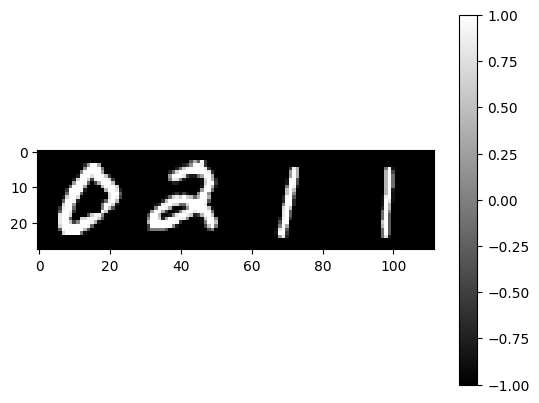

[[0], [2], [1], [1]]

In [ ]:
a = image_tensor[2111]
pn(a[0])
output = model(a.to(device))
number(output[0])

In [ ]:
output.shape

torch.Size([1, 40])

In [ ]:

number(label_tensor[899])

[[0], [8], [9], [9]]

Loading the Model Weights:

When you need to use the model later, you first need to recreate the model instance with the same structure as the one you saved.
Then, you load the saved state dictionary into this model.


In [ ]:
torch.save(model.state_dict(), 'convolution_weights.pth')

In [ ]:
model = SimpleCNN()  # Replace TheModelClass with your model class
model.load_state_dict(torch.load('model_weights.pth'))
model.eval()  # Set the model to evaluation mode
